In [1]:
import pandas as pd
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline

tableau10 = [(78, 121, 167), (242, 142, 43), (225, 87, 89), 
             (118, 183, 178), (89, 161, 79), (237, 201, 72), 
             (176, 122, 161), (225, 157, 167), (156, 117, 95), 
             (186, 176, 172)]

for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.)
    
from pylab import rcParams
rcParams['font.family'] = 'Roboto'
font0 = FontProperties()
font0.set_weight('light')
#font0.set_weight(1000)

PHIAL 2.0 was previously evaluating mutational burden and suggesting a score based on a simple methodology of Score = (1-TCGA percentile)*10. This was successful for Melanoma, but was not successful for the prostate samples. We decided to institute an additional rule to classify high mutational burden of requiring at least 10 mutations per Mb.

This threshold was in a NEJM study for colorectal cancer http://www.nejm.org/doi/full/10.1056/NEJMoa1500596#t=article

## VanAllen, Miao metastatic melanoma cohort (n = 110)

In [34]:
allFiles = glob.glob('mel-ipi/output/phial2-target2/*/*burden.txt')
df = pd.DataFrame()
list_ = []

burden = []
percentile_tcga = []
percentile_tissue = []
score = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, sep = '\t')
    burden += [round(df_.ix[0,'Mutational_Burden_per_Mb'],2)]
    percentile_tcga += [round(df_.ix[0,'Percentile_TCGA'],4)]
    percentile_tissue += [round(df_.ix[0,'Percentile_TCGA_Melanoma'],4)]
    score += [round(df_.ix[0,'Score'],4)]

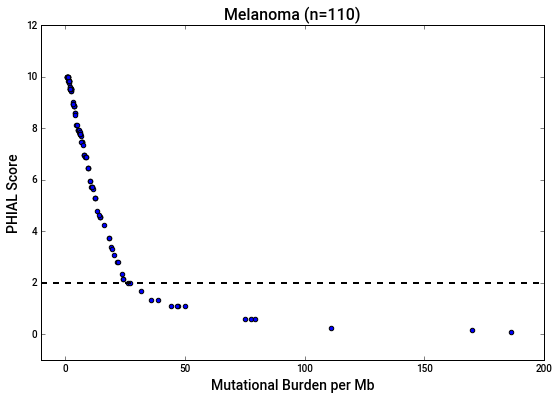

In [61]:
plt.figure(figsize=(9, 6))

plt.scatter(burden, score)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

plt.xlim([-10, 200])
plt.ylim([-1,12])

plt.ylabel('PHIAL Score', fontsize = 14)
plt.xlabel('Mutational Burden per Mb', fontsize = 14)
plt.title('Melanoma (n=110)', fontsize = 16)

plt.show()

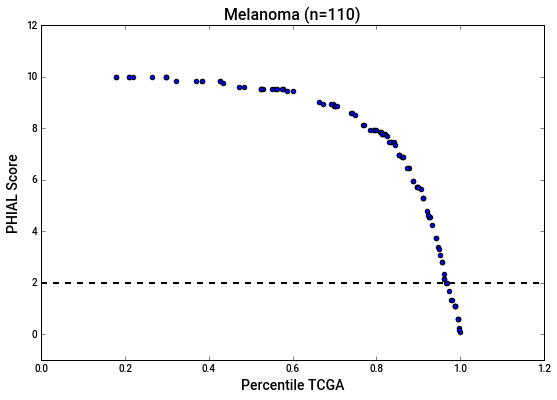

In [62]:
plt.figure(figsize=(9, 6))

plt.scatter(percentile_tcga, score)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

#plt.xlim([-10, 200])
plt.ylim([-1,12])

plt.ylabel('PHIAL Score', fontsize = 14)
plt.xlabel('Percentile TCGA', fontsize = 14)
plt.title('Melanoma (n=110)', fontsize = 16)

plt.show()

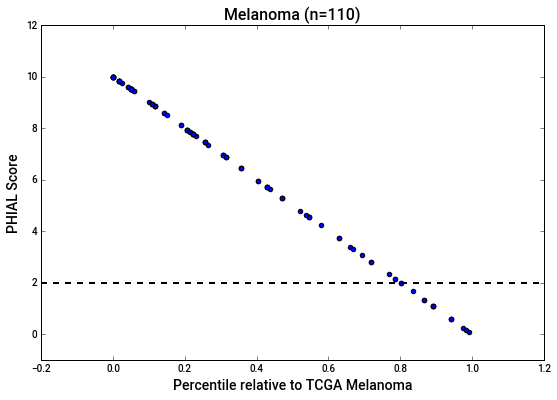

In [63]:
plt.figure(figsize=(9, 6))

plt.scatter(percentile_tissue, score)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

#plt.xlim([-10, 200])
plt.ylim([-1,12])

plt.ylabel('PHIAL Score', fontsize = 14)
plt.xlabel('Percentile relative to TCGA Melanoma', fontsize = 14)
plt.title('Melanoma (n=110)', fontsize = 16)

plt.show()

## Robinson metastatic castration resistant prostate cancer (n = 150)

In [64]:
allFiles = glob.glob('su2c/output/phial2-target2/*/*burden.txt')
df = pd.DataFrame()
list_ = []

burden = []
percentile_tcga = []
percentile_tissue = []
score = []

for file_ in allFiles:
    df_ = pd.read_csv(file_, sep = '\t')
    burden += [round(df_.ix[0,'Mutational_Burden_per_Mb'],2)]
    percentile_tcga += [round(df_.ix[0,'Percentile_TCGA'],4)]
    percentile_tissue += [round(df_.ix[0,'Percentile_TCGA_Prostate'],4)]
    score += [round(df_.ix[0,'Score'],4)]

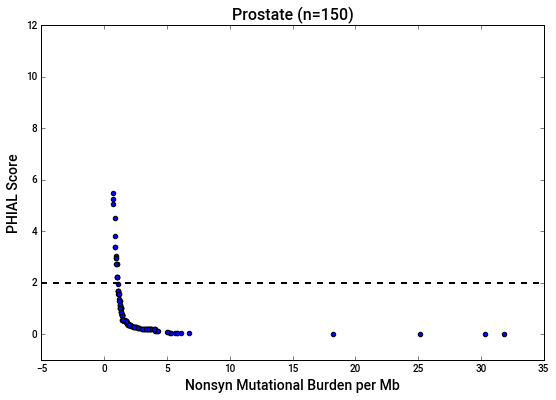

In [70]:
plt.figure(figsize=(9, 6))

plt.scatter(burden, score)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

plt.ylim([-1,12])

plt.ylabel('PHIAL Score', fontsize = 14)
plt.xlabel('Nonsyn Mutational Burden per Mb', fontsize = 14)
plt.title('Prostate (n=150)', fontsize = 16)

plt.show()

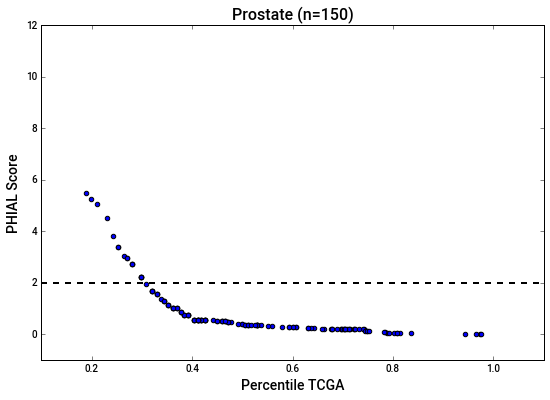

In [69]:
plt.figure(figsize=(9, 6))

plt.scatter(percentile_tcga, score)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

#plt.xlim([-10, 200])
plt.ylim([-1,12])

plt.ylabel('PHIAL Score', fontsize = 14)
plt.xlabel('Percentile TCGA', fontsize = 14)
plt.title('Prostate (n=150)', fontsize = 16)

plt.show()

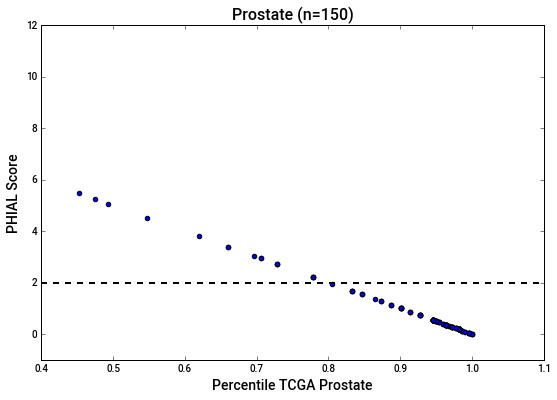

In [71]:
plt.figure(figsize=(9, 6))

plt.scatter(percentile_tissue, score)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

#plt.xlim([-10, 200])
plt.ylim([-1,12])

plt.ylabel('PHIAL Score', fontsize = 14)
plt.xlabel('Percentile TCGA Prostate', fontsize = 14)
plt.title('Prostate (n=150)', fontsize = 16)

plt.show()

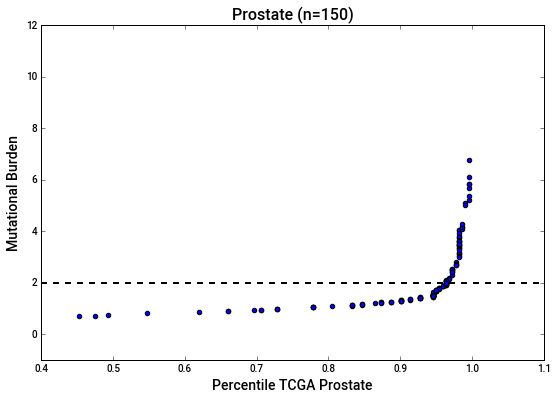

In [73]:
plt.figure(figsize=(9, 6))

plt.scatter(percentile_tissue, burden)
plt.axhline(y=2, xmin=0, xmax=200, linewidth=2, color = 'k', linestyle = '--')

#plt.xlim([-10, 200])
plt.ylim([-1,12])

plt.ylabel('Mutational Burden', fontsize = 14)
plt.xlabel('Percentile TCGA Prostate', fontsize = 14)
plt.title('Prostate (n=150)', fontsize = 16)

plt.show()